<a href="https://ibb.co/h3GAuq"><img src="https://preview.ibb.co/fWgbZq/GMIT-LOGO.png" alt="GMIT-LOGO" border="0" /></a>

***
# Machine Learning and Statistics Module
***

## Noa Pereira Prada Schnor

This assessment concerns the well-known Boston House Prices dataset and the Python packages scipy, keras, and jupyter. The project consists in five sections: 
1. Introduction of the Boston House Price Dataset; 
2. Description - descriptive statistics and plots to describe the Boston House Price dataset; 
3. Inference/Analysis - using inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t; 
4. Prediction - using keras to create a neural network that can predict the median house price based on the other variables in the dataset;
5. Conclusions.

### 1. Introduction of the Boston House Price Dataset

The dataset was first published in 1978 contains US census data concerning houses in various areas around the city of Boston. Each sample (row) corresponds to a unique area and has 13 measures (variables/columns) and one variable 'target' that is the price[1]

### 2. Descriptive statistics

In [1]:
#import libraries
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from scipy.stats import mstats, kruskal
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
#Load the Boston Housing dataset from sklearn.datasets
df = load_boston()

In [3]:
# Description of the dataset
print(df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#Conversion to numpy array - target is the variable MEDV (input is the price/'target' and the outputs are the 'feature names')

df_bsn = pd.DataFrame(df.data,columns=df.feature_names)
df_bsn['target'] = pd.Series(df.target)

df_bsn = pd.DataFrame(df['data'], columns=df['feature_names'])
df_bsn['target'] = df['target']

In [5]:
#Check missing data. The result shows that there are no missing data for all atributes.
df_bsn.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [6]:
#Check the first rows of the dataset to see how the data looks
df_bsn.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
#Check if the dataset is stored in an array by returning a Numpy representation of the Dataframe
df_bsn.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

### Data Exploration

In [8]:
#Summary and description of the dataset to get a detailed statistical information for each column
df_bsn.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


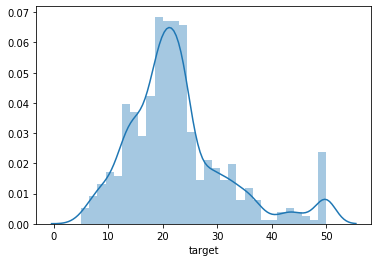

In [9]:
#Check the distribution shape of the target (price) variable by plotting a distplot
sns.distplot(df_bsn['target'], bins=30)
plt.show()

The values of target seem to be distributed normally with few outliers and slight skewed to right.

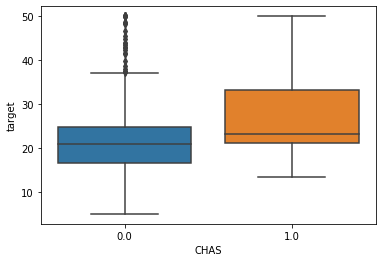

In [10]:
#Check for outliers of the target variable (price) by the variable 'CHAS'

sns.boxplot(x="CHAS", y="target", data=df_bsn)
plt.show()

The variable target (price) is skewed to the right. Furthermore, it looks like that there are some unusually high median-values in the data, especially in the areas that do not bounds the River. To confirm it there is a QQ Plot of those variables below.

[None]

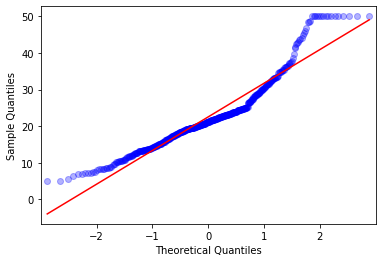

In [11]:
#Plot QQPlot to assess if the target (price) variable came from some theoretical distribution such as a Normal or exponential
pr = sm.qqplot(df_bsn["target"], line='s')

dt = pr.findobj(lambda x: hasattr(x, 'get_color') and x.get_color() == 'b')

[d.set_alpha(0.3) for d in dt]

In [12]:
#Check the skeweness of the distribution of the data
print(df_bsn.skew())

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
target     1.108098
dtype: float64


Values close to 0 show less skew

In [13]:
#Check if the data is heavy or light-tailed to a normal distribution by using Kurtosis
print(df_bsn.kurt())

CRIM       37.130509
ZN          4.031510
INDUS      -1.233540
CHAS        9.638264
NOX        -0.064667
RM          1.891500
AGE        -0.967716
DIS         0.487941
RAD        -0.867232
TAX        -1.142408
PTRATIO    -0.285091
B           7.226818
LSTAT       0.493240
target      1.495197
dtype: float64


It looks like the variables CRIM, ZN and B are too peaked, with heavy tails or outliers. The variables CRIM and ZN are also highly skewed. The distribution of the variable RM is approximately symmetric. The target variable is moderated skewed and leptokurtic (<3), consisting in a curve highly arched at the mean with short tails.

### 3. Inference Analysis

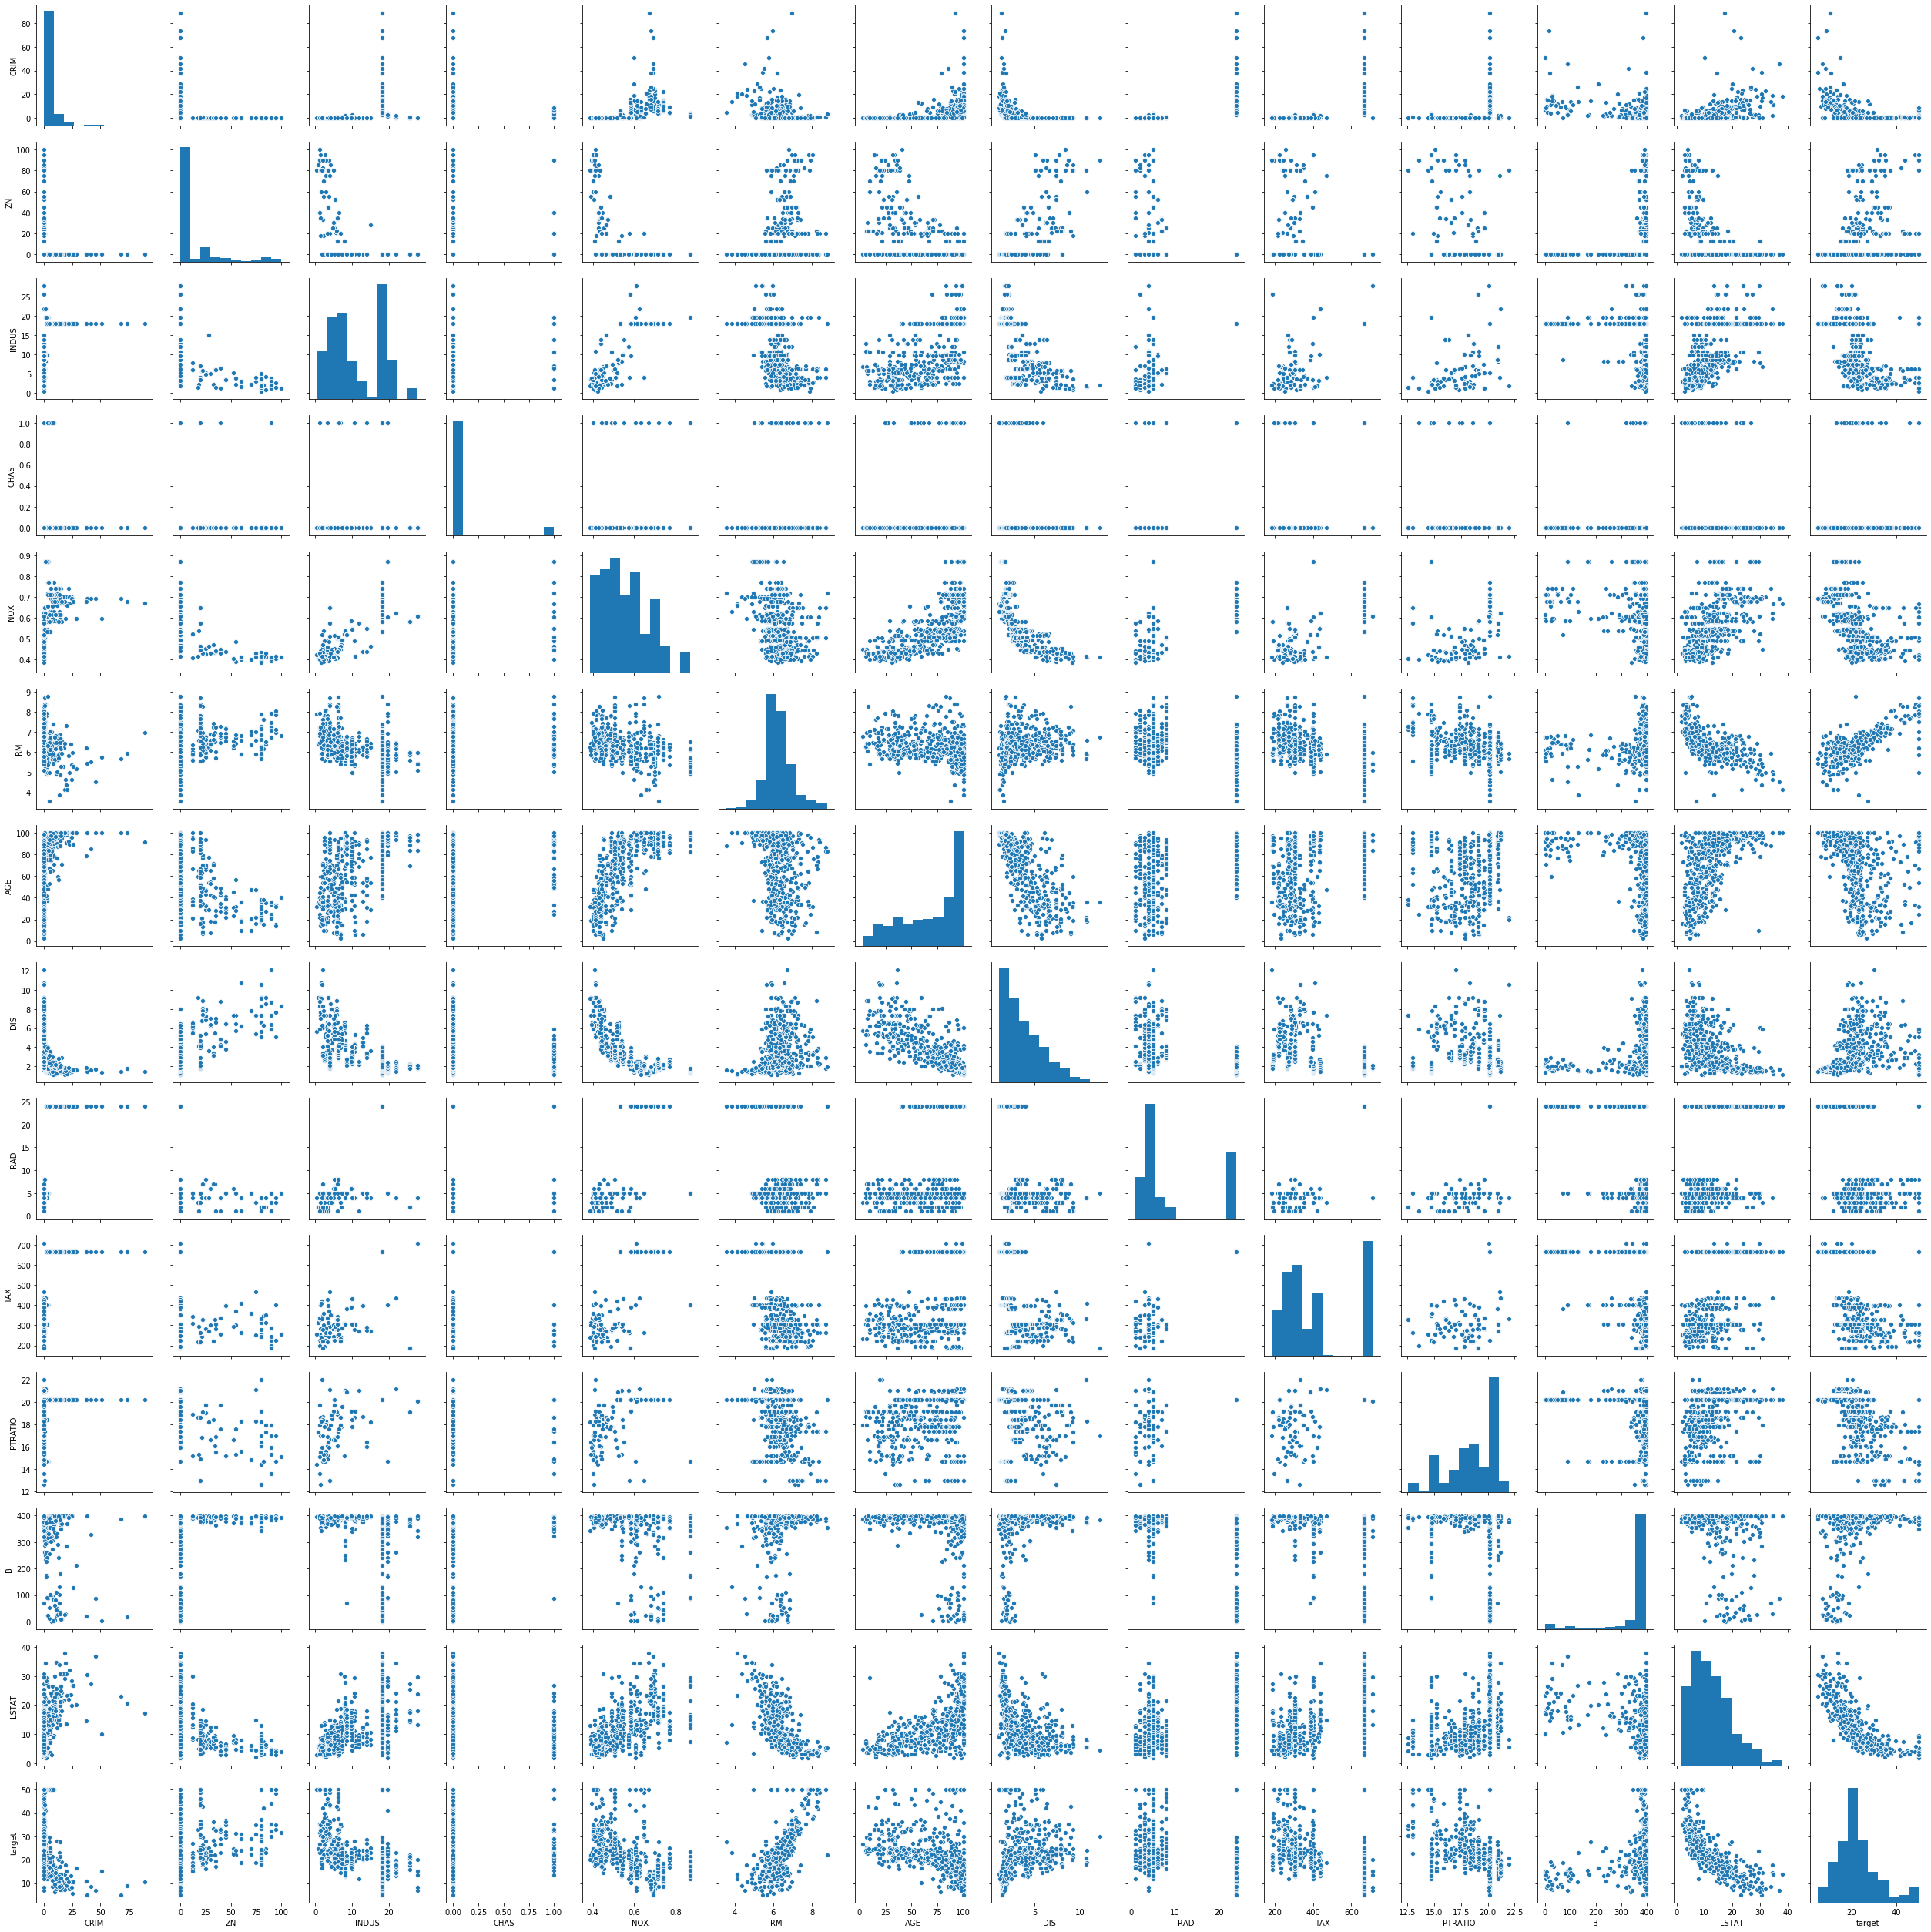

In [14]:
# Plot a pairplot to  visualize the relationship between variables
sns.pairplot(df_bsn)

RM and MEDV have the closest shape to normal distributions.AGE is skewed to the left and LSTAT is skewed to the right. For TAX, we find a large amount of the distribution is around 700. This is also evident from the scatter plots

C:\Users\User\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


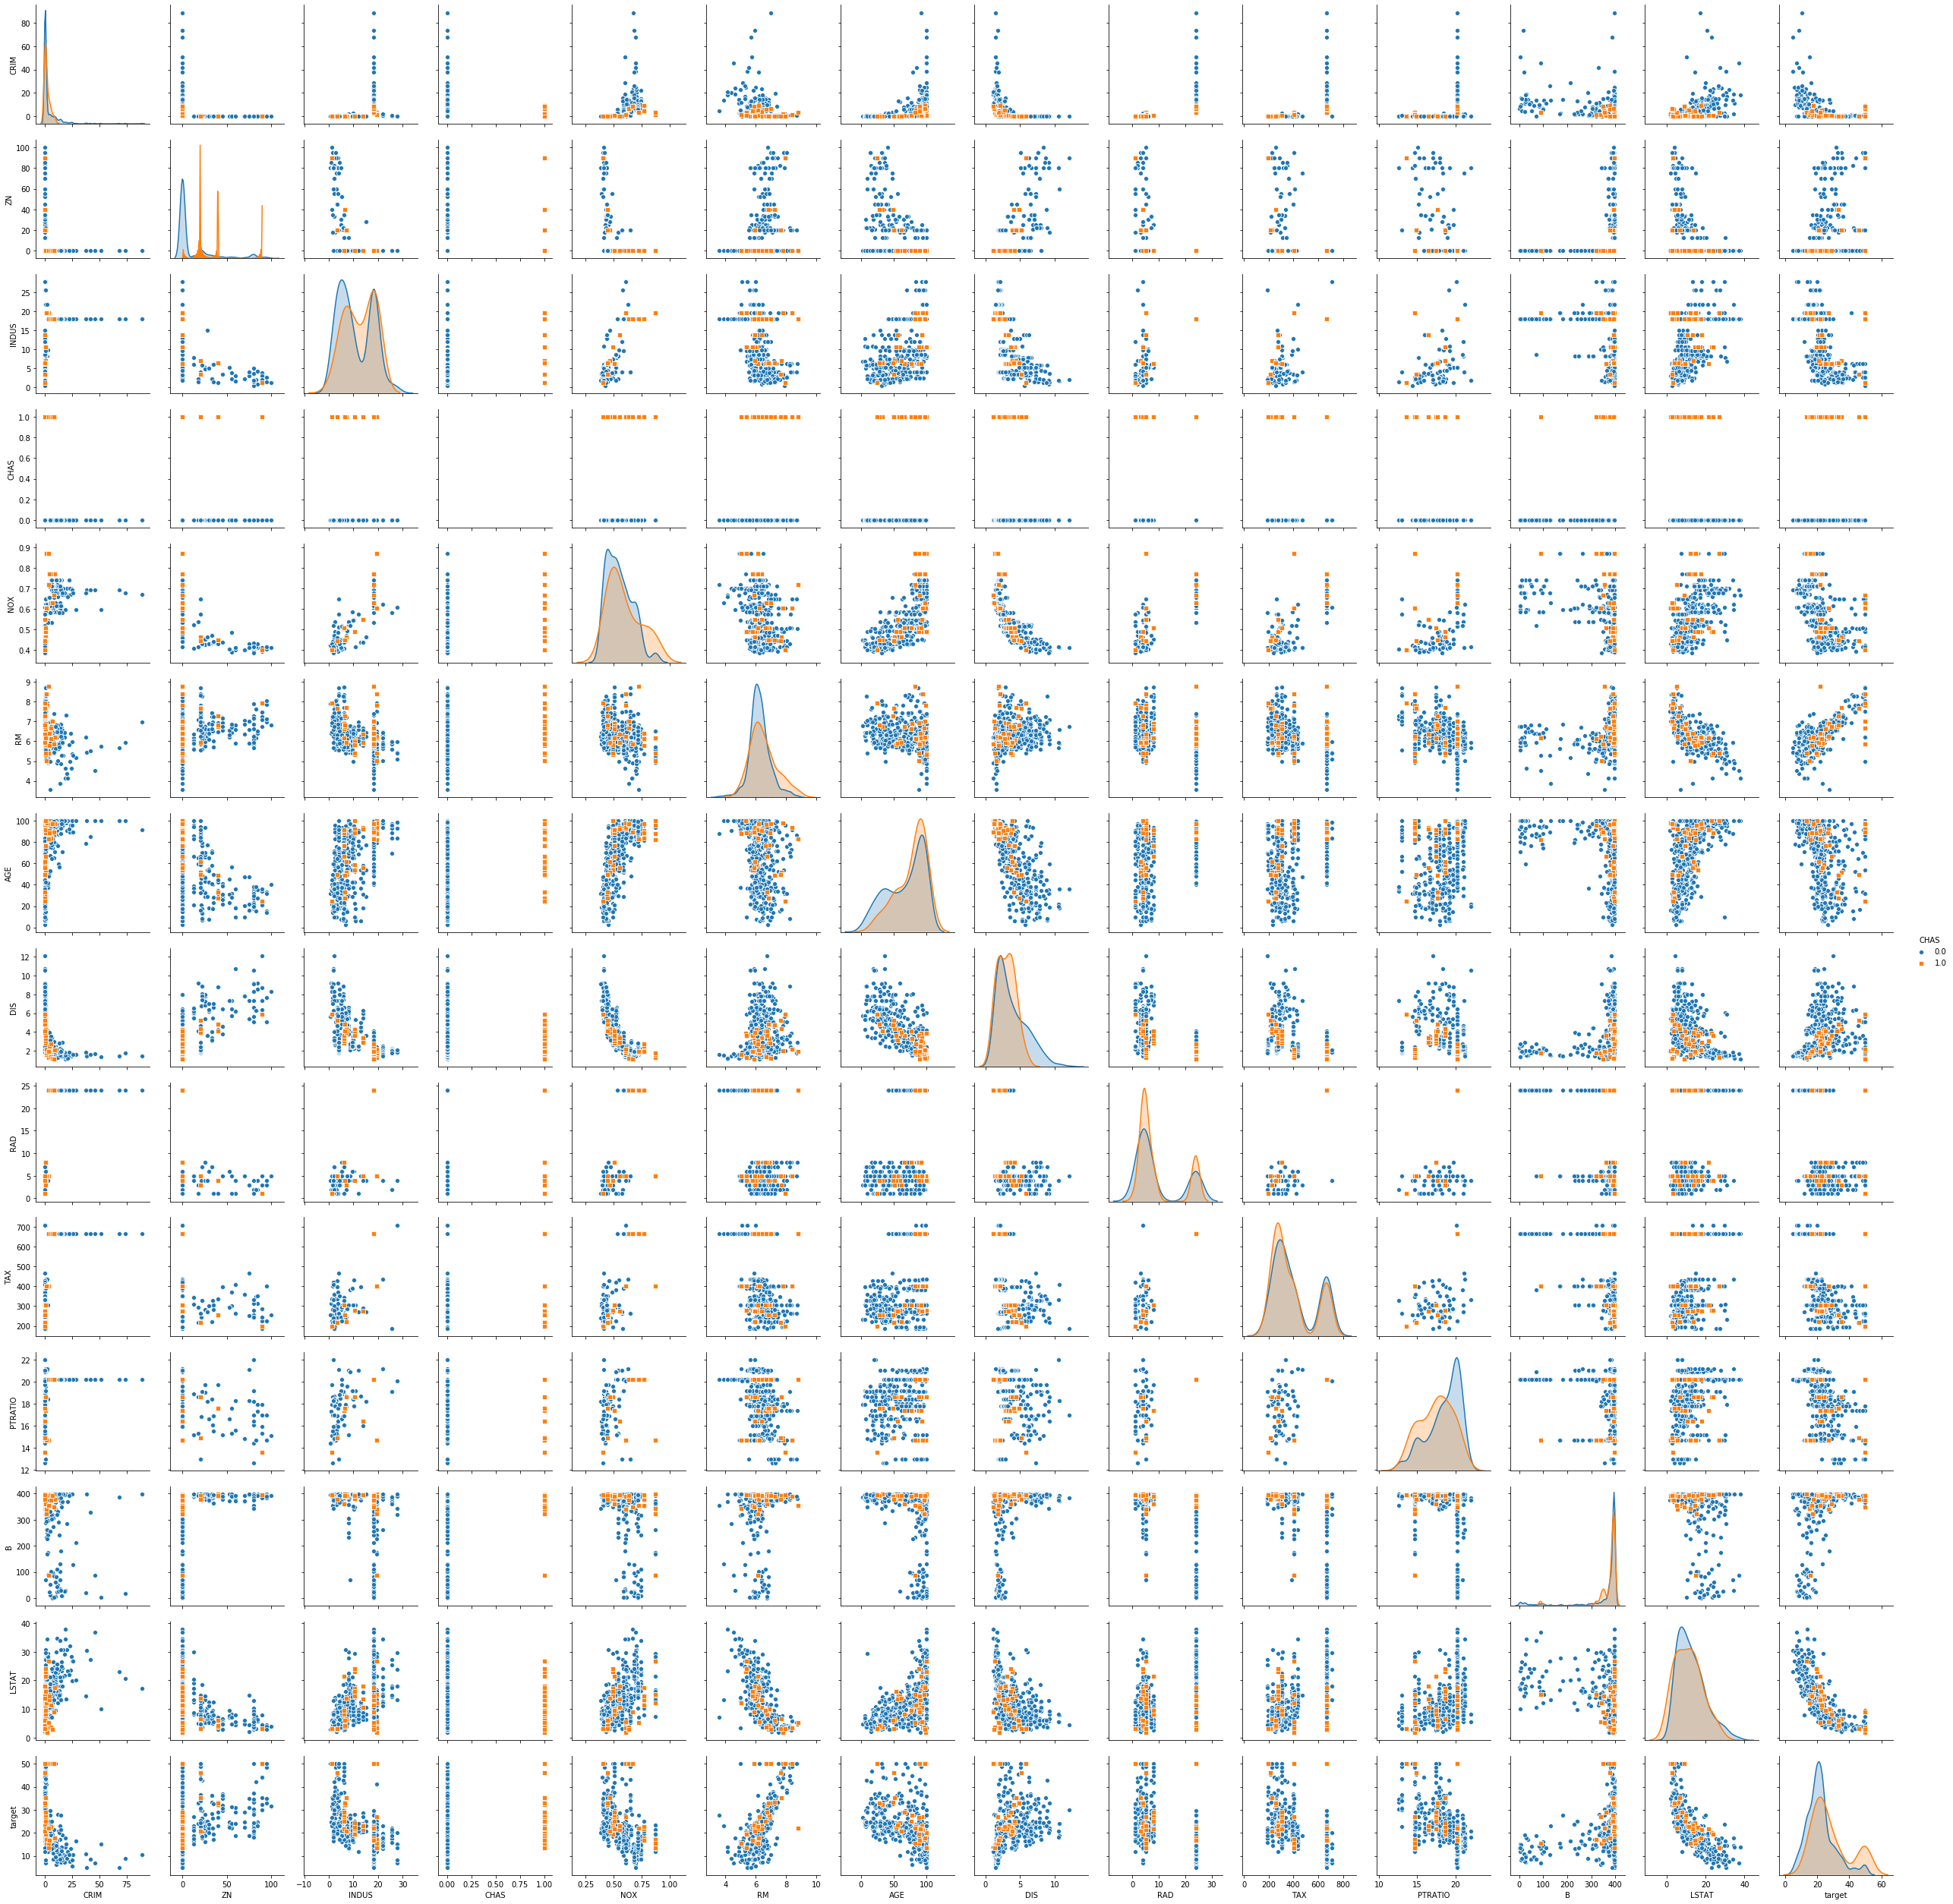

In [15]:
# Plot a pairplot to  visualize the relationship between variables by the boolean variable CHAS
sns.pairplot(df_bsn, hue="CHAS", markers=["o", "s"])

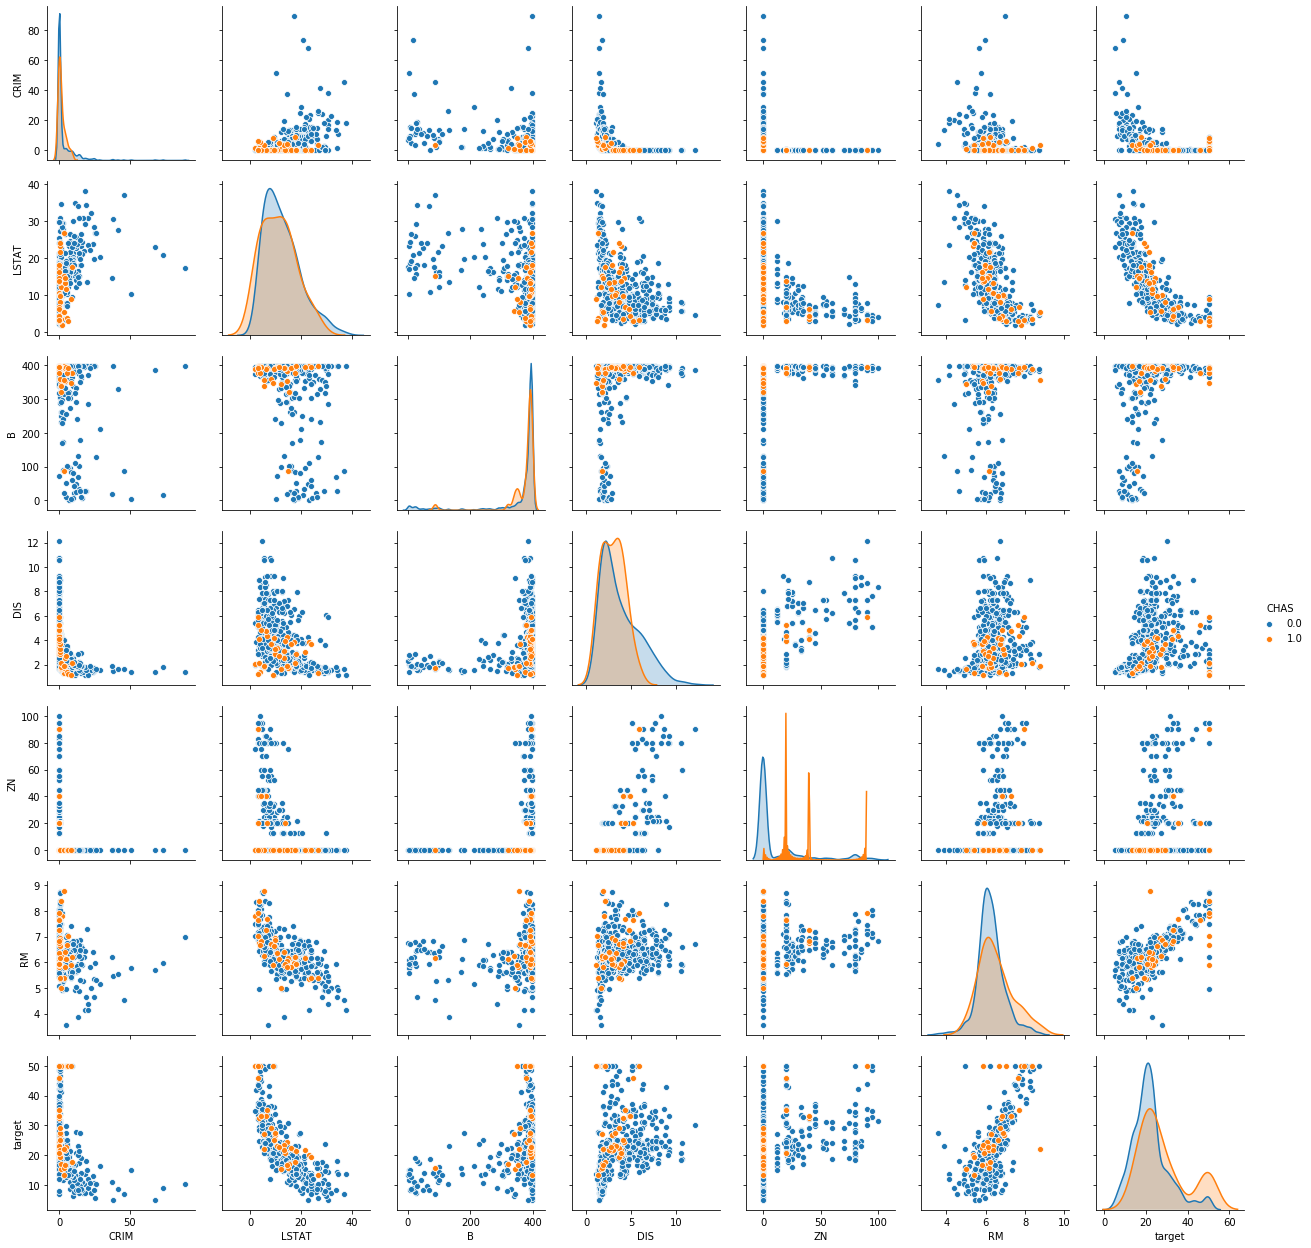

In [16]:
#Plot another pairplot with some of variables to take a closer look
sns.pairplot(df_bsn, hue="CHAS", vars=["CRIM", "LSTAT", "B", "DIS", "ZN", "RM", "target"])

Looking at the target (price) it looks like that the variable CRIM (per capita crime rate by town) does not seem to have a strong relationship with price regarding the area traits the River or not as most of the areas that the tract bounds the River have a value nearly 0 of CRIM and the price varies a lot. However, when the areas do not bounds the River it looks like the price tends to be higher when the CRIM value is low.
Most of the areas that bounds the River have a value of B around 400 and it looks like the price varies a lot in areas with the same value of B.
Mainly areas that bounds the River have a value of 0 for ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) and even with the same value of ZN the price varies. 
The LSTAT (% lower status of the population) variable seems to be negatively correlated and the variable RM (average number of rooms per dwelling) positively correlated with price for CHAS equal to 1 or 0.

In [17]:
# Measure the strength of association between the boolean variable CHAS and the continuous variable target (price) trough Point Biserial Correlation Coefficient
scipy.stats.pointbiserialr (df_bsn['CHAS'], df_bsn['target'])

PointbiserialrResult(correlation=0.17526017719029846, pvalue=7.39062317051802e-05)

The correlation between the variables is weak. Besides, it shows evidence that there is not a statistically significant association between the two variables.

In [18]:
#Correlation score between each set of values
df_bsn.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


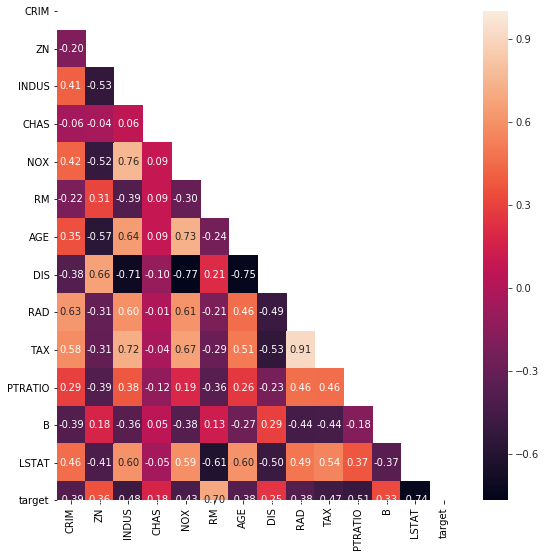

In [19]:
# Heatmap of Pearson Correlation with no redundant mappings to see the relationships in far more detail

corr = df_bsn.corr(method='pearson')
fig, ax = plt.subplots(figsize=(9, 9))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
     ax = sns.heatmap(corr, annot=True, fmt=".2f", mask=mask)
plt.show()

From the Pearson Correlation the attributes LSTAT, RM, and PTRATIO seem to have good correlation with the variable price.

In [20]:
#Set the variable CHAS as an integer
df_bsn['CHAS'] = df_bsn['CHAS'].astype('int64')

In [21]:
#Split the dataset in 2 groups related to the CHAS variable
river = df_bsn[df_bsn['CHAS'] == 1.0]
noriver = df_bsn[df_bsn['CHAS'] == 0]

In [22]:
#Drop the variable CHAS from the samples
river = river.drop('CHAS', axis = 1)
noriver = noriver.drop('CHAS', axis=1)

In [23]:
#Describe the samples river and noriver writing rows as columns and vice-versa
river.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,35.0,1.851670,2.494072,0.01501,0.12506,0.44791,3.397665,8.98296
ZN,35.0,7.714286,18.800143,0.00000,0.00000,0.00000,0.000000,90.00000
INDUS,35.0,12.719143,5.957623,1.21000,6.41000,13.89000,18.100000,19.58000
NOX,35.0,0.593426,0.144736,0.40100,0.48900,0.55000,0.693000,0.87100
RM,35.0,6.519600,0.876416,5.01200,5.93550,6.25000,6.915000,8.78000
AGE,35.0,77.500000,22.021340,24.80000,60.30000,88.50000,93.200000,100.00000
DIS,35.0,3.029709,1.254728,1.12960,1.90470,3.04800,3.897300,5.88500
RAD,35.0,9.314286,8.248962,1.00000,4.00000,5.00000,8.000000,24.00000
TAX,35.0,386.257143,165.012004,198.00000,276.00000,307.00000,403.000000,666.00000
PTRATIO,35.0,17.491429,2.081766,13.60000,15.65000,17.60000,18.600000,20.20000


In [24]:
noriver.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,471.0,3.744447,8.876818,0.00632,0.07964,0.24522,3.69503,88.9762
ZN,471.0,11.634820,23.617979,0.00000,0.00000,0.00000,12.50000,100.0000
INDUS,471.0,11.019193,6.913850,0.46000,5.04000,8.56000,18.10000,27.7400
NOX,471.0,0.551817,0.113102,0.38500,0.44800,0.53800,0.62400,0.8710
RM,471.0,6.267174,0.685895,3.56100,5.88200,6.20200,6.59400,8.7250
AGE,471.0,67.911677,28.458924,2.90000,42.50000,76.50000,94.10000,100.0000
DIS,471.0,3.851915,2.145567,1.13700,2.10525,3.21570,5.28730,12.1265
RAD,471.0,9.566879,8.748452,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,471.0,409.870488,168.853790,187.00000,282.50000,330.00000,666.00000,711.0000
PTRATIO,471.0,18.527176,2.155958,12.60000,17.40000,19.10000,20.20000,22.0000


Do the samples river and noriver have the same distribution? To get the answer it was performed the Mann Whitney U test and the Kruskal Wallis H test using scipy functions. These statistical tests are the the nonparametric version of the (paired) Student t-test.

In [25]:
#Mann Whitney U test or Wilcoxon-Mann Whitney test
scipy.stats.mannwhitneyu (river,noriver)

MannwhitneyuResult(statistic=-91245.0, pvalue=0.0)

In [26]:
#Kruskal Wallis test
kruskal(river,noriver)

KruskalResult(statistic=248059.66388049236, pvalue=0.0)

The test results show that the samples are likely drawn from samples with differing distributions.

In [27]:
# Check (Pearson) correlation between variables of houses in areas that bound the River
river.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.302485,0.639325,0.624062,-0.062032,0.470851,-0.685555,0.862274,0.907911,0.493618,-0.207697,-0.018366,0.148031
ZN,-0.302485,1.000000,-0.580616,-0.465617,0.378319,-0.785229,0.661636,-0.327125,-0.405298,-0.259031,0.154006,-0.406272,0.371654
INDUS,0.639325,-0.580616,1.000000,0.845865,-0.200930,0.700080,-0.891876,0.490004,0.728635,0.057327,-0.347235,0.120242,-0.128543
NOX,0.624062,-0.465617,0.845865,1.000000,-0.280350,0.589547,-0.807297,0.482438,0.691302,-0.012994,-0.495887,0.256089,-0.361486
RM,-0.062032,0.378319,-0.200930,-0.280350,1.000000,-0.294243,0.212253,0.049545,0.000943,-0.116611,0.096858,-0.759602,0.629536
AGE,0.470851,-0.785229,0.700080,0.589547,-0.294243,1.000000,-0.776869,0.403889,0.541369,0.128481,-0.125676,0.394473,-0.221887
DIS,-0.685555,0.661636,-0.891876,-0.807297,0.212253,-0.776869,1.000000,-0.561426,-0.751410,-0.119082,0.338329,-0.126568,0.093800
RAD,0.862274,-0.327125,0.490004,0.482438,0.049545,0.403889,-0.561426,1.000000,0.943845,0.711803,-0.004580,-0.108858,0.103906
TAX,0.907911,-0.405298,0.728635,0.691302,0.000943,0.541369,-0.751410,0.943845,1.000000,0.538966,-0.152719,-0.073845,0.065748
PTRATIO,0.493618,-0.259031,0.057327,-0.012994,-0.116611,0.128481,-0.119082,0.711803,0.538966,1.000000,0.250584,0.097383,-0.063987


In the neighborhoods that bound the river, there is a strong correlation between price (target) and RM and LSTAT, while there is a week correlation with ZN, NOX, AGE and B and target (price).

In [28]:
# Check (Pearson) correlation between variables of houses in areas that not bound the River
noriver.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.203666,0.412475,0.438255,-0.226783,0.360822,-0.385465,0.631225,0.585506,0.286347,-0.386587,0.469725,-0.414431
ZN,-0.203666,1.000000,-0.530383,-0.523035,0.315498,-0.558844,0.665167,-0.311996,-0.311935,-0.408438,0.179080,-0.417086,0.377912
INDUS,0.412475,-0.530383,1.000000,0.760404,-0.418036,0.640433,-0.701800,0.603203,0.724997,0.415042,-0.362751,0.637824,-0.538610
NOX,0.438255,-0.523035,0.760404,1.000000,-0.316992,0.745631,-0.777587,0.628550,0.675029,0.222263,-0.387396,0.631182,-0.463440
RM,-0.226783,0.315498,-0.418036,-0.316992,1.000000,-0.249119,0.220013,-0.233465,-0.317361,-0.370255,0.127844,-0.602056,0.700861
AGE,0.360822,-0.558844,0.640433,0.745631,-0.249119,1.000000,-0.745673,0.461718,0.510884,0.283362,-0.284442,0.621968,-0.417367
DIS,-0.385465,0.665167,-0.701800,-0.777587,0.220013,-0.745673,1.000000,-0.497463,-0.535155,-0.254061,0.297205,-0.522648,0.288245
RAD,0.631225,-0.311996,0.603203,0.628550,-0.233465,0.461718,-0.497463,1.000000,0.908386,0.451227,-0.463876,0.527041,-0.433061
TAX,0.585506,-0.311935,0.724997,0.675029,-0.317361,0.510884,-0.535155,0.908386,1.000000,0.454856,-0.455034,0.583931,-0.522546
PTRATIO,0.286347,-0.408438,0.415042,0.222263,-0.370255,0.283362,-0.254061,0.451227,0.454856,1.000000,-0.190777,0.388599,-0.540655


In the neighbourhood that not bound the river, the variables that have a strong correlation with price (target) are RM and LSTAT, a moderate correlation with CRIM, INDUS, NOX, AGE, RAD, TAX and PTRATIO and a week correlation with ZN, DIS and B.

In [29]:
#Ordinary Least-Squares (OLS) Regression for areas that bound the river -to estimate the relationship between RM ad LSTAT and the variable price
X = river[['RM', 'LSTAT']]
y = river['target']
mdl = sm.OLS(y, X).fit()
predictions = mdl.predict(X)
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              238.4
Date:                Wed, 20 Nov 2019   Prob (F-statistic):                    2.42e-20
Time:                        22:46:56   Log-Likelihood:                         -121.64
No. Observations:                  35   AIC:                                      247.3
Df Residuals:                      33   BIC:                                      250.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             5.6216      0.349     16.123      0.000       4.912       6.331
LSTAT         -0.7452      0.176     -4.235      0.000      -1.103      -0.387
==============================================================================
Omnibus:                        6.965   Durbin-Watson:                   1.264
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                9.397
Skew:                           0.293   Prob(JB):                      0.00911
Kurtosis:                       5.470   Cond. No.                         3.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model explains 93.5% of the variance in our dependent variable. As RM increases by 1, target(price) variable will increase by 2.3196, when LSTAT increases by 1, target(price) variable will decrease by -1.1011. Besides,  both analysed coefficients are trustworthy as P < 0.05. 

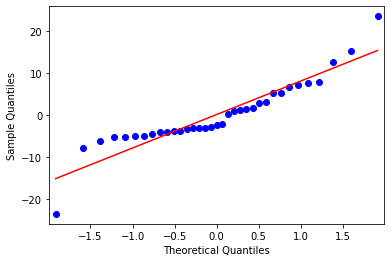

In [30]:
#Q-Q plot for normality to assess if the residuals are normally distributed
qq=sm.qqplot(mdl.resid, line='r')

As expected errors are most of them close to zero with an acceptably small number of outlying values.

In [31]:
#Ordinary Least-Squares (OLS) Regression for areas that noot bound the river -to estimate the relationship between RM ad LSTAT and the variable price
X = noriver[['RM', 'LSTAT']]
y = noriver['target']
mdl = sm.OLS(y, X).fit()
predictions = mdl.predict(X)
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              4670.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):                   2.23e-310
Time:                        22:46:56   Log-Likelihood:                         -1445.0
No. Observations:                 471   AIC:                                      2894.
Df Residuals:                     469   BIC:                                      2902.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.8300      0.069     69.792      0.000       4.694       4.966
LSTAT         -0.6399      0.030    -21.458      0.000      -0.698      -0.581
==============================================================================
Omnibus:                      134.910   Durbin-Watson:                   0.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              397.206
Skew:                           1.353   Prob(JB):                     5.59e-87
Kurtosis:                       6.593   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model explains 95.2% of the variance in our dependent variable.As RM increases by 1, target(price) variable will increase by 4.83, when LSTAT increases by 1, target(price) variable will decrease by -0.6399. Besides,  both analysed coefficients are trustworthy as P < 0.05. 

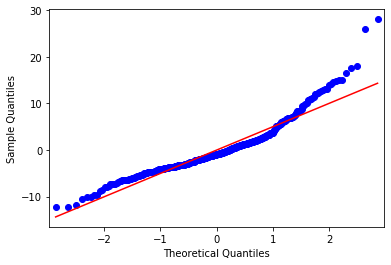

In [32]:
#Q-Q plot for normality to assess if the residuals are normally distributed
qq=sm.qqplot(mdl.resid, line='r')

In [33]:
# Perform t test to check if there is a price difference between houses in areas that bound or not the River 
stats.ttest_ind(river['target'], noriver['target'])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

The t test result shows that there's difference between the average price of houses in areas that bound the river and those that don't bound the river as p<0.05. 

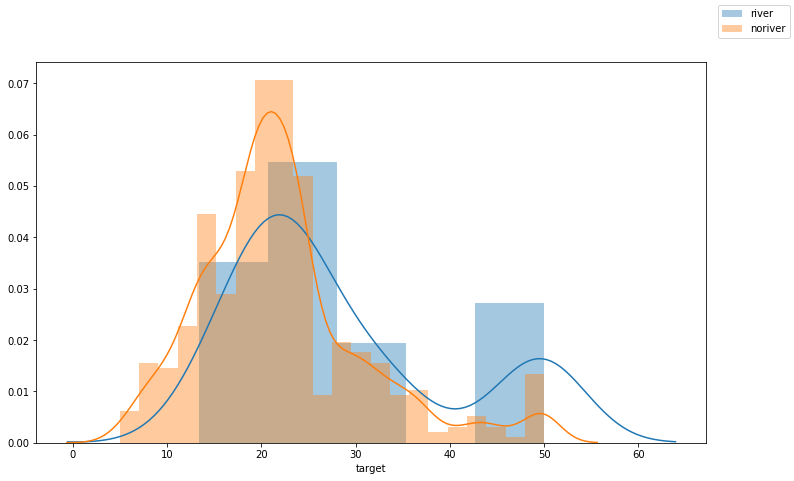

In [34]:
#Plot distplot of target variable by variable CHAS

fig = plt.figure(figsize=(12,7))
sns.distplot(river['target'])
sns.distplot(noriver['target'])
fig.legend(labels=['river','noriver'])
plt.show()               

The displot clearly shows that there is difference between the mean price of houses in areas that bound or not the River.

### 4. Prediction - Neural Network using keras

In [35]:
#Split the dataset into input features (i) and the feature that is going to be predicted - price (p)

i = df_bsn.iloc[:,0:13] #assign the first 13 columns of our array to a variable i
p = df_bsn.iloc[:,13]

i

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [36]:
#Make sure that the scale of the input features are similar as some of the dataset features have different scale and it makes difficult to for the initialization of the neural network

minmaxscaler = preprocessing.MinMaxScaler()
i_scale = minmaxscaler.fit_transform(i)

In [37]:
# Split the dataset into a training set, a validation set and a test set (in total 6 variables i_train, i_val, i_test, p_train,p_val and p_test)

i_train, i_val_and_test, p_train, p_val_and_test = train_test_split(i_scale, p, test_size=0.3) #val_and_test size will be 30% of the overall dataset
i_val, i_test, p_val, p_test = train_test_split(i_val_and_test, p_val_and_test, test_size=0.5) #val_ and _test split equally to the validation set and the test set

#Check the shapes of the arrays
i_train.shape, i_val.shape, i_test.shape, p_train.shape, p_val.shape, p_test.shape

((354, 13), (76, 13), (76, 13), (354,), (76,), (76,))

 Variable _train counts for 70% of full dataset, _val for 15% and _test for 15%.

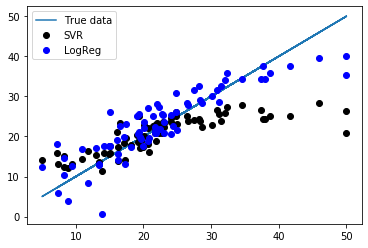

In [38]:
#Check the classifiers - SVR (Support Vector Regression) and Linear Regression

svr = SVR(kernel='rbf',  C=100.0, epsilon=0.2, gamma=0.001)
log = LinearRegression()

# Train both models
svr.fit(i_train, p_train)
log.fit(i_train, p_train)

# Predict test labels from both models
predLog = log.predict(i_test)
predSvr = svr.predict(i_test)

# Show it on the plot
plt.plot(p_test, p_test, label='True data')
plt.plot(p_test, predSvr, 'ko', label='SVR')
plt.plot(p_test, predLog, 'bo', label='LogReg')
plt.legend()
plt.show()

In [39]:
confidence = svr.score(i_test, p_test)
print(confidence)

0.48164591231643855


In [40]:
confidence = log.score(i_test, p_test)
print(confidence)

0.7789889444569715


As the plot shows and the accuracy result also shows the best classifier in this case is Linear Regression. 

In [41]:
#Set up the architecture - first and second layer as a dense (fully-connected) layers with 64 neurons, ReLU activation and the input shape is 13 and the last layer layer is a dense layer with 1 neuron
    model = Sequential([Dense(64, kernel_initializer='normal', activation='relu', input_shape=(13,)),Dense(64, kernel_initializer='normal',activation='relu'), Dense(1, kernel_initializer='normal'),
]) #Create model
    
    model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy']) #Compile model
    
    model.fit(i_train, p_train, epochs=150, batch_size=10, verbose=0) #Fit the model

The baseline model was created to be evaluated. The mean squared error loss function is optimized as it is a desirable metric as taking the square root gives an error value that can be better understand in the context of the problem (price in dollars).

In [42]:
#Check the predicted price and the actual prices using the linear regression model

linear_model = LinearRegression()

linear_model.fit(i_train, p_train)

predicted_house_price = linear_model.predict(i_test)

predicted_dataframe = pd.DataFrame(
    {"Predicted_Prices": predicted_house_price, "Actual_Prices": p_test})
print(predicted_dataframe)

     Predicted_Prices  Actual_Prices
94          27.166779           20.6
413         14.013026           16.3
95          29.092749           28.4
16          20.979228           23.1
104         22.119452           20.1
..                ...            ...
223         30.017699           30.1
71          21.384529           21.7
302         28.248578           26.4
326         23.631111           23.0
110         20.737130           21.7

[76 rows x 2 columns]


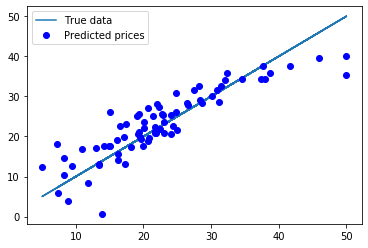

In [43]:
plt.plot(p_test, p_test, label='True data')
plt.plot(p_test, predicted_house_price, 'bo', label='Predicted prices')
plt.legend()
plt.show()

In [44]:
predictions_i = model.predict(i_test)
predictions_i

array([[22.726126 ],
       [11.856732 ],
       [27.09133  ],
       [20.476887 ],
       [19.833546 ],
       [28.470587 ],
       [11.652047 ],
       [12.344747 ],
       [22.187372 ],
       [43.634846 ],
       [26.914528 ],
       [44.617054 ],
       [19.352907 ],
       [17.451128 ],
       [20.698858 ],
       [19.12536  ],
       [34.932888 ],
       [44.465782 ],
       [35.542294 ],
       [23.033995 ],
       [27.809908 ],
       [20.049128 ],
       [29.503149 ],
       [33.318604 ],
       [ 8.663385 ],
       [12.746383 ],
       [18.570436 ],
       [26.352955 ],
       [33.825478 ],
       [15.806666 ],
       [ 9.0644865],
       [36.440098 ],
       [15.082659 ],
       [29.604658 ],
       [18.666254 ],
       [45.60358  ],
       [21.132023 ],
       [17.98683  ],
       [21.40341  ],
       [10.327638 ],
       [19.807322 ],
       [11.714258 ],
       [14.107176 ],
       [17.235872 ],
       [16.857096 ],
       [24.218142 ],
       [19.999454 ],
       [ 9.27

In [45]:
#Evaluate the model on the test
results = model.evaluate(i_test, p_test, batch_size=128)

76/76 [==============================] - 0s 461us/step


In [46]:
#Regression error metrics (MSE and MAE) linear regression model and keras 

#Linear regression model
mse = mean_squared_error(predicted_house_price, p_test) #the average squared difference between the predicted values and what is predicted
mae = mean_absolute_error(predicted_house_price, p_test) #how big of an error we can expect from the forecast on average
print(mse, mae)

20.021193698381666 3.3203244994437062


In [47]:
#Keras
mse = mean_squared_error(predictions_i, p_test)
mae = mean_absolute_error(predicted_house_price, p_test)
print(mse, mae)

10.30406288202991 3.3203244994437062


### 5 - Conclusions

From descriptive
From inferential
From neural network

### References

[1] Boston House Prices. Available at https://www.kaggle.com/vikrishnan/boston-house-prices

## The end